# 사인파 예측

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 데이터 생성

**샘플 데이터 생성 함수 선언**

In [2]:
def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data) - window):
        train.append(data[i:i + window])
        target.append(data[i + window])
    return np.array(train), np.array(target)

**사인함수 y값 생성**

In [3]:
sin = [[np.sin(np.pi * i * 0.01)] for i in np.arange(0, 1000)]

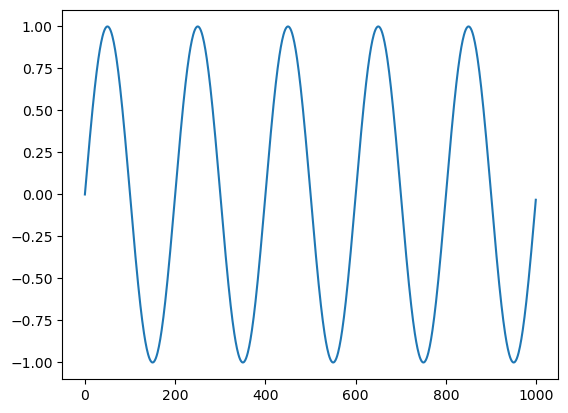

In [4]:
plt.plot(sin)
plt.show()

**샘플화**

In [5]:
X, y = make_sample(sin, 10)
print(X.shape, y.shape)

(990, 10, 1) (990, 1)


## 예측 모델 선언

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM

In [7]:
model = Sequential()

**Simple RNN**

$10 \times 1 \Rightarrow 10 \times 10$

In [8]:
model.add(SimpleRNN(10, activation='tanh', input_shape=(10,1)))

**Dense**

결과 ($\sin x$)값 출력

$10 \times 10 \Rightarrow 1$

In [9]:
model.add(Dense(1, activation='tanh'))

**모델 컴파일**

In [10]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100


2024-06-05 14:45:52.951407: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


31/31 [==============================] - 0s 1ms/step - loss: 0.6320
Epoch 2/100
31/31 [==============================] - 0s 1ms/step - loss: 0.1317
Epoch 3/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0544
Epoch 4/100
31/31 [==============================] - 0s 962us/step - loss: 0.0408
Epoch 5/100
31/31 [==============================] - 0s 836us/step - loss: 0.0316
Epoch 6/100
31/31 [==============================] - 0s 832us/step - loss: 0.0241
Epoch 7/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0182
Epoch 8/100
31/31 [==============================] - 0s 979us/step - loss: 0.0137
Epoch 9/100
31/31 [==============================] - 0s 983us/step - loss: 0.0108
Epoch 10/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 11/100
31/31 [==============================] - 0s 921us/step - loss: 0.0080
Epoch 12/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 13/100
31/31 [=================

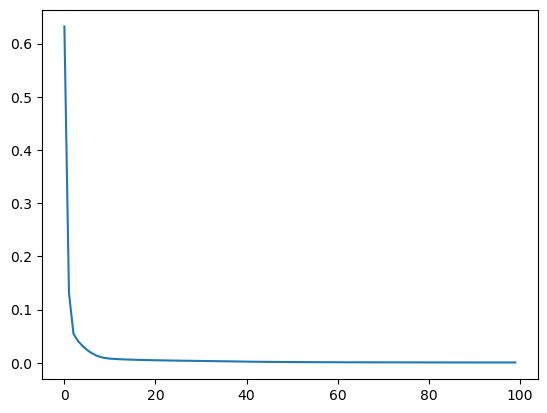

In [12]:
plt.plot(history.history['loss'])
plt.show()

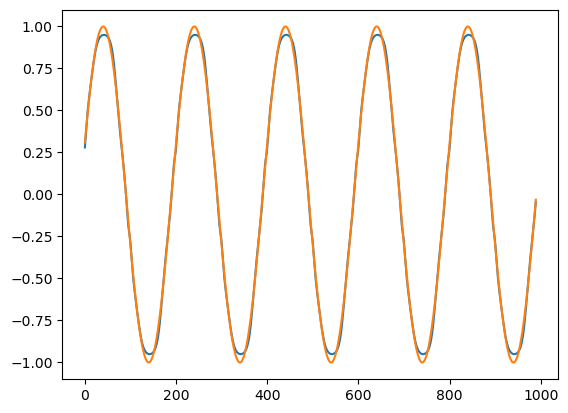

In [13]:
y_pred = model.predict(X, verbose= 0)
plt.plot(y_pred)
plt.plot(y)
plt.show()